# HW8

# DSCI 552

# Chunhao Zhang 5764821257

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, auc, roc_curve, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering
from scipy.special import softmax
from sklearn.neighbors import KNeighborsClassifier
import random
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

In [2]:
ConvergenceWarning('ignore')
warnings.filterwarnings('ignore')

# 1. Supervised, Semi-Supervised, and Unsupervised Learning


# (a)

In [ ]:
data = pd.read_csv('wdbc.data', header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# (b)

In [ ]:
data.replace('M', 0, inplace = True)
data.replace('B', 1, inplace = True)

data_pos = data[data[1] == 1]
data_neg = data[data[1] == 0]

# i.

In [ ]:
def data_split_bi(data_pos, data_neg):
    
    train_pos_X, test_pos_X, train_pos_y, test_pos_y = train_test_split(data_pos.iloc[:, 2:], data_pos.iloc[:, 1], test_size = 0.2)
    train_neg_X, test_neg_X, train_neg_y, test_neg_y = train_test_split(data_neg.iloc[:, 2:], data_neg.iloc[:, 1], test_size = 0.2)

    X_train, X_test = pd.concat([train_pos_X, train_neg_X], axis = 0), pd.concat([test_pos_X, test_neg_X], axis = 0)
    y_train, y_test = pd.concat([train_pos_y, train_neg_y], axis = 0), pd.concat([test_pos_y, test_neg_y], axis = 0)
    
    scaler = MinMaxScaler()
    X_train_scl = scaler.fit_transform(X_train)
    X_test_scl = scaler.transform(X_test)
    
    return X_train_scl, X_test_scl, y_train, y_test

In [ ]:
params = {'C': [10 ** i for i in np.arange(-2, 5, dtype = float)]}

In [ ]:
accuracy_scores, precision_scores, recall_scores, f1_scores, aucs = [[], []], [[], []], [[], []], [[], []], [[], []]
roc_train, roc_test = [[], []], [[], []]
cm_train, cm_test = {'TP': [], 'FN': [], 'FP': [], 'TN': []}, {'TP': [], 'FN': [], 'FP': [], 'TN': []}


for i in range(30):
    X_train, X_test, y_train, y_test = data_split_bi(data_pos, data_neg)
    
    model = LinearSVC(penalty = 'l1', dual = False, random_state = 15)
    
    cv_search = GridSearchCV(estimator = model, param_grid = params, cv = 5).fit(X_train, y_train)
    
    optimal_model = LinearSVC(penalty = 'l1', C = cv_search.best_params_['C'], dual = False, random_state = 15)
    optimal_model.fit(X_train, y_train)
    
    
    y_train_pre, y_test_pre = optimal_model.predict(X_train), optimal_model.predict(X_test)
    
    accuracy_scores[0].append(optimal_model.score(X_train, y_train))
    accuracy_scores[1].append(optimal_model.score(X_test, y_test))
    
    precision_scores[0].append(precision_score(y_train, y_train_pre))
    precision_scores[1].append(precision_score(y_test, y_test_pre))
    
    recall_scores[0].append(recall_score(y_train, y_train_pre))
    recall_scores[1].append(recall_score(y_test, y_test_pre))
    
    
    f1_scores[0].append(f1_score(y_train, y_train_pre))
    f1_scores[1].append(f1_score(y_test, y_test_pre))
    
    a, b, c, d = confusion_matrix(y_train, y_train_pre).ravel()
    cm_train['TP'].append(a)
    cm_train['FN'].append(b)
    cm_train['FP'].append(c)
    cm_train['TN'].append(d)
    
    a, b, c, d = confusion_matrix(y_test, y_test_pre).ravel()
    cm_test['TP'].append(a)
    cm_test['FN'].append(b)
    cm_test['FP'].append(c)
    cm_test['TN'].append(d)
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pre, pos_label = 1)
    aucs[0].append(auc(fpr, tpr))
    roc_train[0].append(fpr)
    roc_train[1].append(tpr)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pre, pos_label = 1)
    aucs[1].append(auc(fpr, tpr))
    roc_test[0].append(fpr)
    roc_test[1].append(tpr)

In [ ]:
score_report = {'Score type': ['average accuracy score', 'average precision score', 'average recall score', 'average F1 score', 'average AUC'],
                  'Training data': [np.mean(accuracy_scores[0]), np.mean(precision_scores[0]), np.mean(recall_scores[0]), np.mean(f1_scores[0]), np.mean(aucs[0])],
                    'Test data': [np.mean(accuracy_scores[1]), np.mean(precision_scores[1]), np.mean(recall_scores[1]), np.mean(f1_scores[1]), np.mean(aucs[1])]}

score_report  = pd.DataFrame(score_report)
score_report

,Score type,Training data,Test data
0,average accuracy score,0.981645,0.964638
1,average precision score,0.980673,0.961879
2,average recall score,0.990292,0.982870
3,average F1 score,0.985448,0.972129
4,average AUC,0.978677,0.958489


In [ ]:
cm_train = pd.DataFrame(cm_train)
print('Confusion matrix on training data of 30 times:')
cm_train

Confusion matrix on training data of 30 times:


,TP,FN,FP,TN
0,163,6,4,281
1,163,6,6,279
2,164,5,0,285
3,163,6,1,284
4,164,5,2,283
5,163,6,3,282
6,162,7,3,282
7,165,4,5,280
8,164,5,2,283
9,164,5,2,283


30


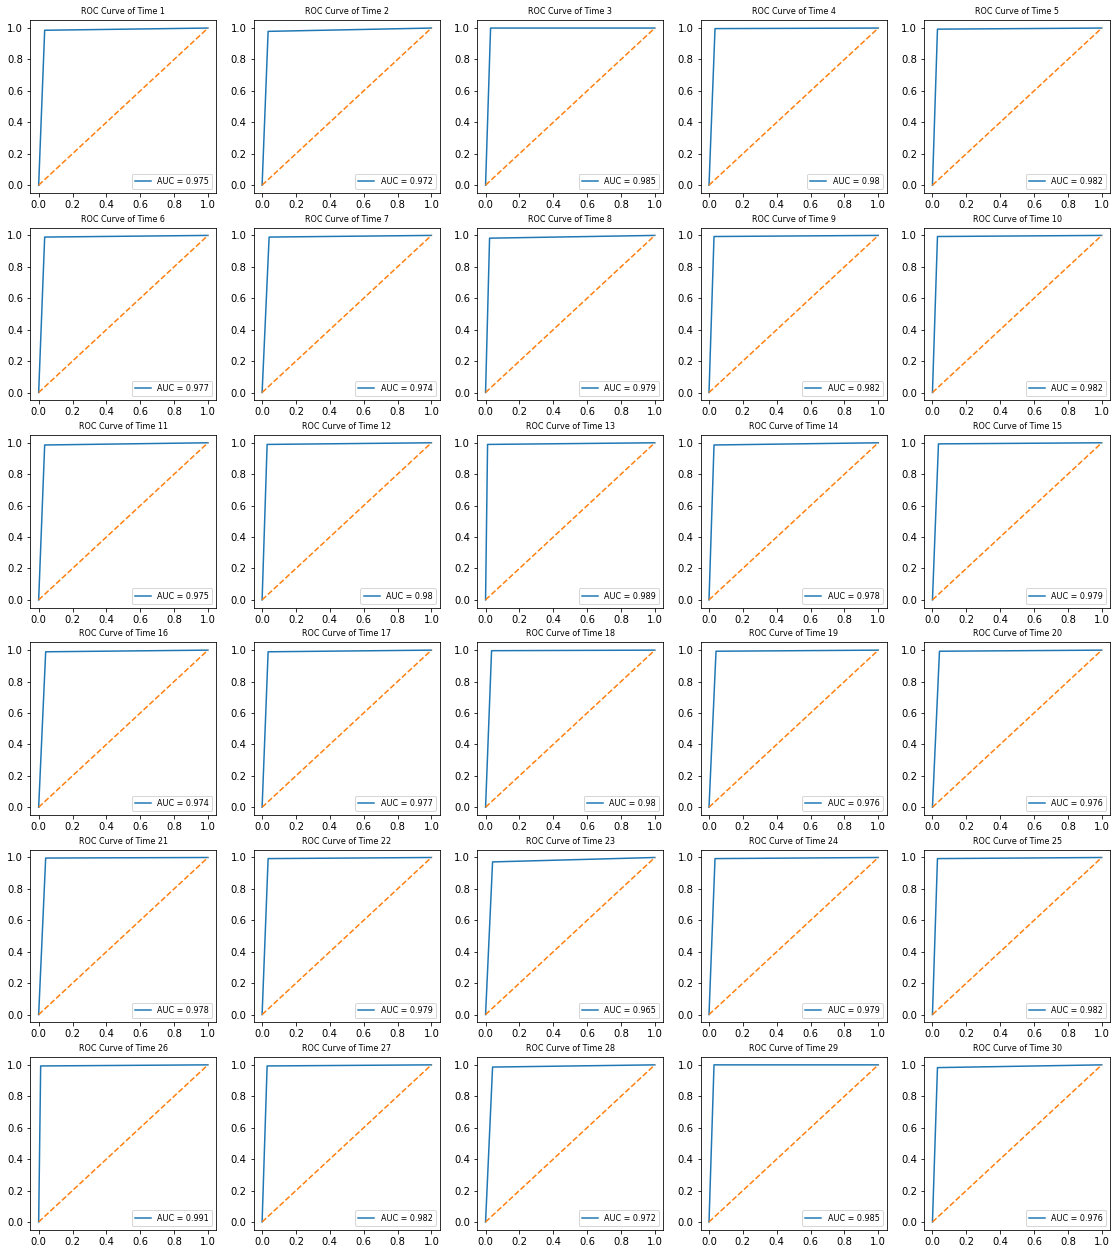

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_train[0][n],roc_train[1][n], label = 'AUC = {}'.format(round(aucs[0][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        #ax[i][j].set_xlabel('False Positive Rate')
        #ax[i][j].set_ylabel('True Positive Rate')
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    163
FN      6
FP      4
TN    281
Name: 0, dtype: int64


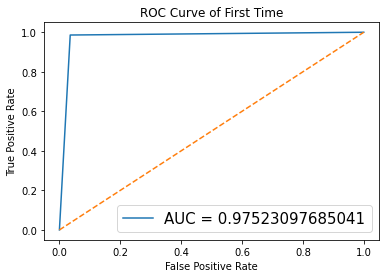

In [ ]:
###   report the first time of ROC, confusion matrix for training data
print('Confusion matrix: ')
print(cm_train.iloc[0,:])
plt.plot(roc_train[0][0],roc_train[1][0], label = 'AUC = {}'.format(aucs[0][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

In [ ]:
cm_test = pd.DataFrame(cm_test)
print('Confusion matrix on test data of 30 times:')
cm_test

Confusion matrix on test data of 30 times:


,TP,FN,FP,TN
0,42,1,1,71
1,36,7,2,70
2,39,4,0,72
3,37,6,1,71
4,40,3,5,67
5,40,3,1,71
6,43,0,1,71
7,41,2,1,71
8,39,4,1,71
9,39,4,1,71


30


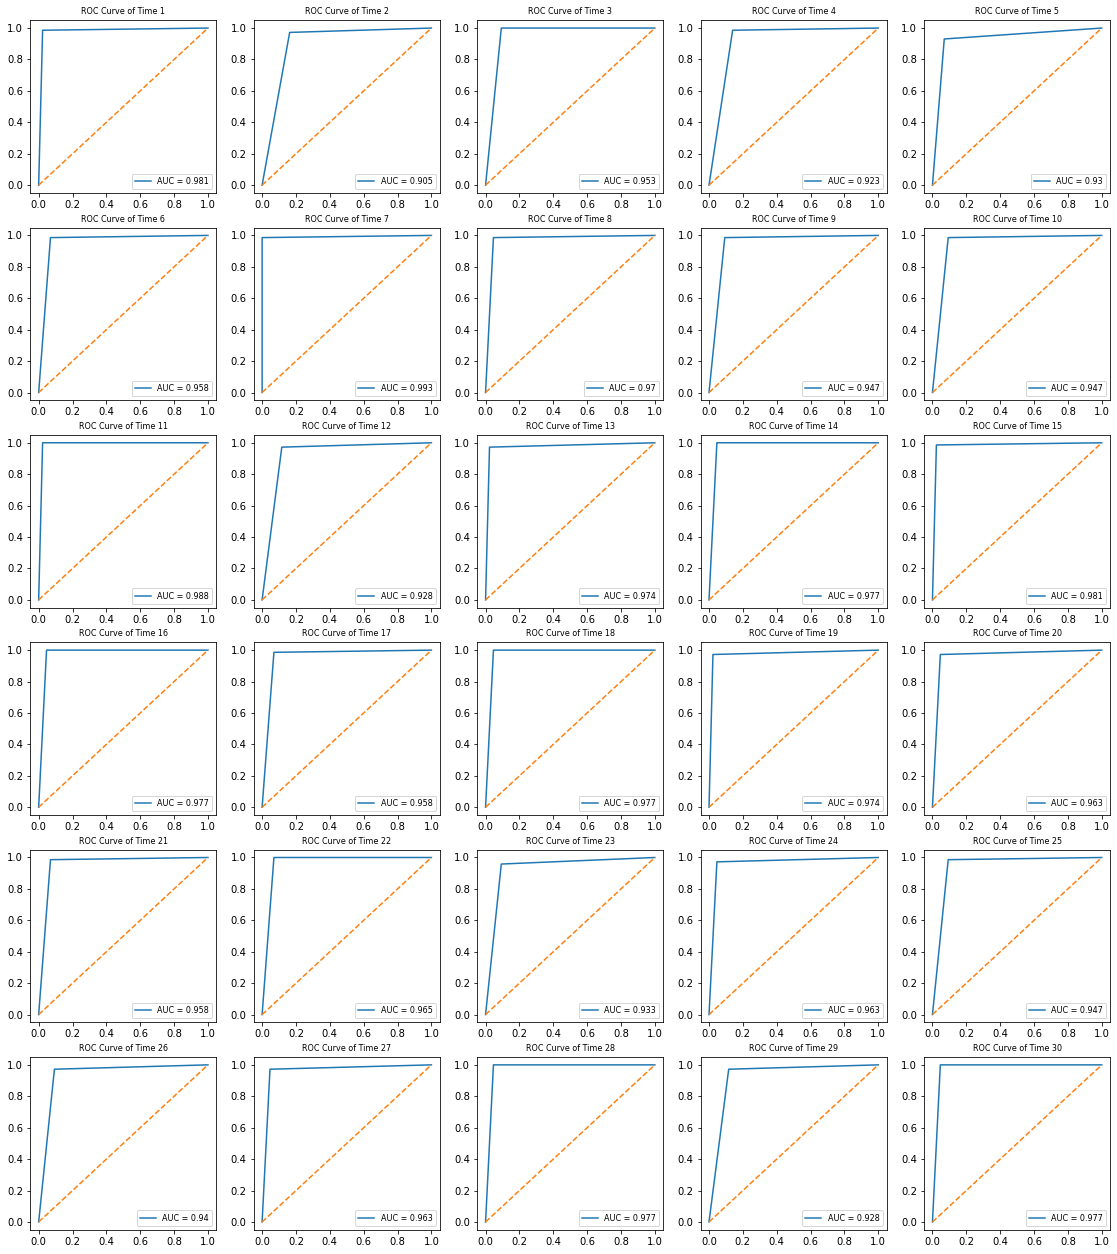

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_test[0][n],roc_test[1][n], label = 'AUC = {}'.format(round(aucs[1][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        #ax[i][j].set_xlabel('False Positive Rate')
        #ax[i][j].set_ylabel('True Positive Rate')
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    42
FN     1
FP     1
TN    71
Name: 0, dtype: int64


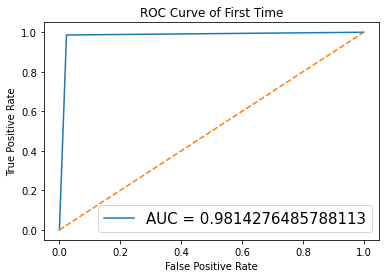

In [ ]:
###   report the first time of ROC, confusion matrix for test data
print('Confusion matrix: ')
print(cm_test.iloc[0,:])
plt.plot(roc_test[0][0],roc_test[1][0], label = 'AUC = {}'.format(aucs[1][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

# ii.

In [ ]:
def data_split_bii(data_pos, data_neg):
    
    train_pos_X, test_pos_X, train_pos_y, test_pos_y = train_test_split(data_pos.iloc[:, 2:], data_pos.iloc[:, 1], test_size = 0.2)
    train_neg_X, test_neg_X, train_neg_y, test_neg_y = train_test_split(data_neg.iloc[:, 2:], data_neg.iloc[:, 1], test_size = 0.2)

    
    train_pos_X_label, train_pos_X_unlabel, train_pos_y_label, train_pos_y_unlabel = train_test_split(train_pos_X, train_pos_y, test_size = 0.5)
    train_neg_X_label, train_neg_X_unlabel, train_neg_y_label, train_neg_y_unlabel = train_test_split(train_neg_X, train_neg_y, test_size = 0.5)
    
    X_train_label = pd.concat([train_pos_X_label, train_neg_X_label], axis = 0)
    y_train_label = pd.concat([train_pos_y_label, train_neg_y_label], axis = 0)
    
    X_train_unlabel = pd.concat([train_pos_X_unlabel, train_neg_X_unlabel], axis = 0)
    #y_train_unlabel = pd.concat([train_pos_y_unlabel, train_neg_y_unlabel], axis = 0)
    
    X_test = pd.concat([test_pos_X, test_neg_X], axis = 0)
    y_test = pd.concat([test_pos_y, test_neg_y], axis = 0)
    
    scaler = MinMaxScaler()
    X_train_label_scl = scaler.fit_transform(X_train_label)
    X_test_scl = scaler.transform(X_test)
    
    return X_train_label_scl, X_train_unlabel, X_test_scl, y_train_label, y_test, scaler

In [ ]:
params = {'C': [10 ** i for i in np.arange(-2, 5, dtype = float)]}

In [ ]:
accuracy_scores, precision_scores, recall_scores, f1_scores, aucs = [[], []], [[], []], [[], []], [[], []], [[], []]
roc_train, roc_test = [[], []], [[], []]
cm_train, cm_test = {'TP': [], 'FN': [], 'FP': [], 'TN': []}, {'TP': [], 'FN': [], 'FP': [], 'TN': []}


for i in range(30):
    X_train_label_scl, X_train_unlabel, X_test_scl, y_train_label, y_test, scaler = data_split_bii(data_pos, data_neg)
    
    model = LinearSVC(penalty = 'l1', dual = False)
    cv_search = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs = -1)
    cv_search.fit(X_train_label_scl, y_train_label)
    
    
    while len(X_train_unlabel):
        db = cv_search.decision_function(X_train_unlabel)

        db_min = abs(sorted(db, key = abs)[0])
        
        
        target_point = []
        for i in range(len(db)):
            if abs(db[i]) == db_min:
                target_point.append(i)
                
        
        new_X = X_train_unlabel.iloc[target_point, :]
        new_y = []
        for i in target_point:
            if db[i] < 0:
                new_y.append(1)
            else:
                new_y.append(0)

            
        X_train_unlabel.drop(X_train_unlabel.index[target_point], inplace = True)
        
        X_train_label_scl = np.concatenate((X_train_label_scl, new_X))
        y_train_label = np.concatenate((y_train_label, new_y))
        
        model = LinearSVC(penalty = 'l1', dual = False)
        final_model = GridSearchCV(estimator = model, param_grid = params, cv = 5, n_jobs = -1).fit(X_train_label_scl, y_train_label)
    
    
    y_train_pre, y_test_pre = final_model.predict(X_train_label_scl), final_model.predict(X_test_scl)
    
    accuracy_scores[0].append(final_model.score(X_train_label_scl, y_train_label))
    accuracy_scores[1].append(final_model.score(X_test_scl, y_test))
    
    precision_scores[0].append(precision_score(y_train_label, y_train_pre))
    precision_scores[1].append(precision_score(y_test, y_test_pre))
    
    recall_scores[0].append(recall_score(y_train_label, y_train_pre))
    recall_scores[1].append(recall_score(y_test, y_test_pre))
    
    
    f1_scores[0].append(f1_score(y_train_label, y_train_pre))
    f1_scores[1].append(f1_score(y_test, y_test_pre))
    
    a, b, c, d = confusion_matrix(y_train_label, y_train_pre).ravel()
    cm_train['TP'].append(a)
    cm_train['FN'].append(b)
    cm_train['FP'].append(c)
    cm_train['TN'].append(d)
    
    a, b, c, d = confusion_matrix(y_test, y_test_pre).ravel()
    cm_test['TP'].append(a)
    cm_test['FN'].append(b)
    cm_test['FP'].append(c)
    cm_test['TN'].append(d)
    
    fpr, tpr, thresholds = roc_curve(y_train_label, y_train_pre, pos_label = 1)
    aucs[0].append(auc(fpr, tpr))
    roc_train[0].append(fpr)
    roc_train[1].append(tpr)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pre, pos_label = 1)
    aucs[1].append(auc(fpr, tpr))
    roc_test[0].append(fpr)
    roc_test[1].append(tpr)

In [ ]:
score_report = {'Score type': ['average accuracy score', 'average precision score', 'average recall score', 'average F1 score', 'average AUC'],
                  'Training data': [np.mean(accuracy_scores[0]), np.mean(precision_scores[0]), np.mean(recall_scores[0]), np.mean(f1_scores[0]), np.mean(aucs[0])],
                    'Test data': [np.mean(accuracy_scores[1]), np.mean(precision_scores[1]), np.mean(recall_scores[1]), np.mean(f1_scores[1]), np.mean(aucs[1])]}

score_report  = pd.DataFrame(score_report)
score_report

,Score type,Training data,Test data
0,average accuracy score,0.991850,0.954493
1,average precision score,0.991879,0.947346
2,average recall score,0.998198,0.982407
3,average F1 score,0.995022,0.964401
4,average AUC,0.981044,0.945080


In [ ]:
cm_train = pd.DataFrame(cm_train)
print('Confusion matrix on training data of 30 times:')
cm_train

Confusion matrix on training data of 30 times:


,TP,FN,FP,TN
0,79,5,0,370
1,81,3,1,369
2,84,0,0,370
3,80,4,0,370
4,83,1,1,369
5,82,2,1,369
6,81,3,1,369
7,79,5,2,368
8,81,3,1,369
9,81,3,1,369


30


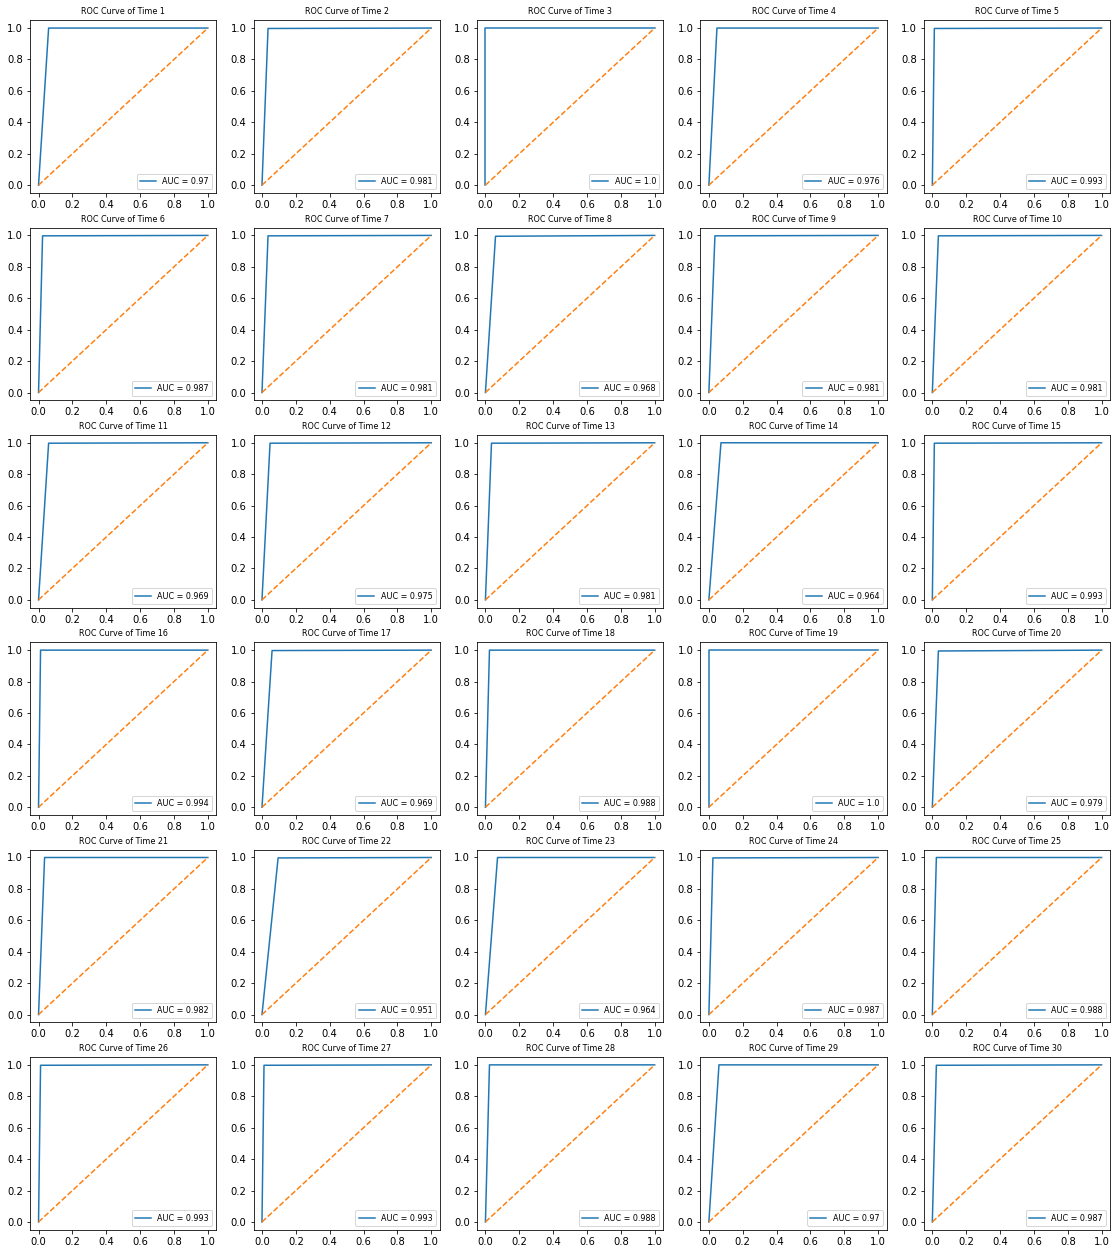

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_train[0][n],roc_train[1][n], label = 'AUC = {}'.format(round(aucs[0][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP     79
FN      5
FP      0
TN    370
Name: 0, dtype: int64


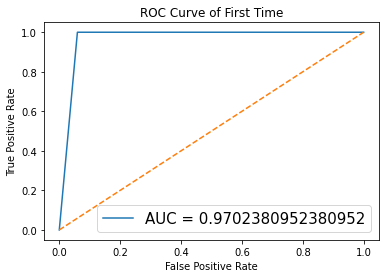

In [ ]:
###   report the first time of ROC, confusion matrix for training data
print('Confusion matrix: ')
print(cm_train.iloc[0,:])
plt.plot(roc_train[0][0],roc_train[1][0], label = 'AUC = {}'.format(aucs[0][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

In [ ]:
cm_test = pd.DataFrame(cm_test)
print('Confusion matrix on test data of 30 times:')
cm_test

Confusion matrix on test data of 30 times:


,TP,FN,FP,TN
0,38,5,0,72
1,39,4,3,69
2,36,7,1,71
3,40,3,0,72
4,37,6,2,70
5,40,3,0,72
6,42,1,0,72
7,40,3,1,71
8,39,4,2,70
9,36,7,0,72


30


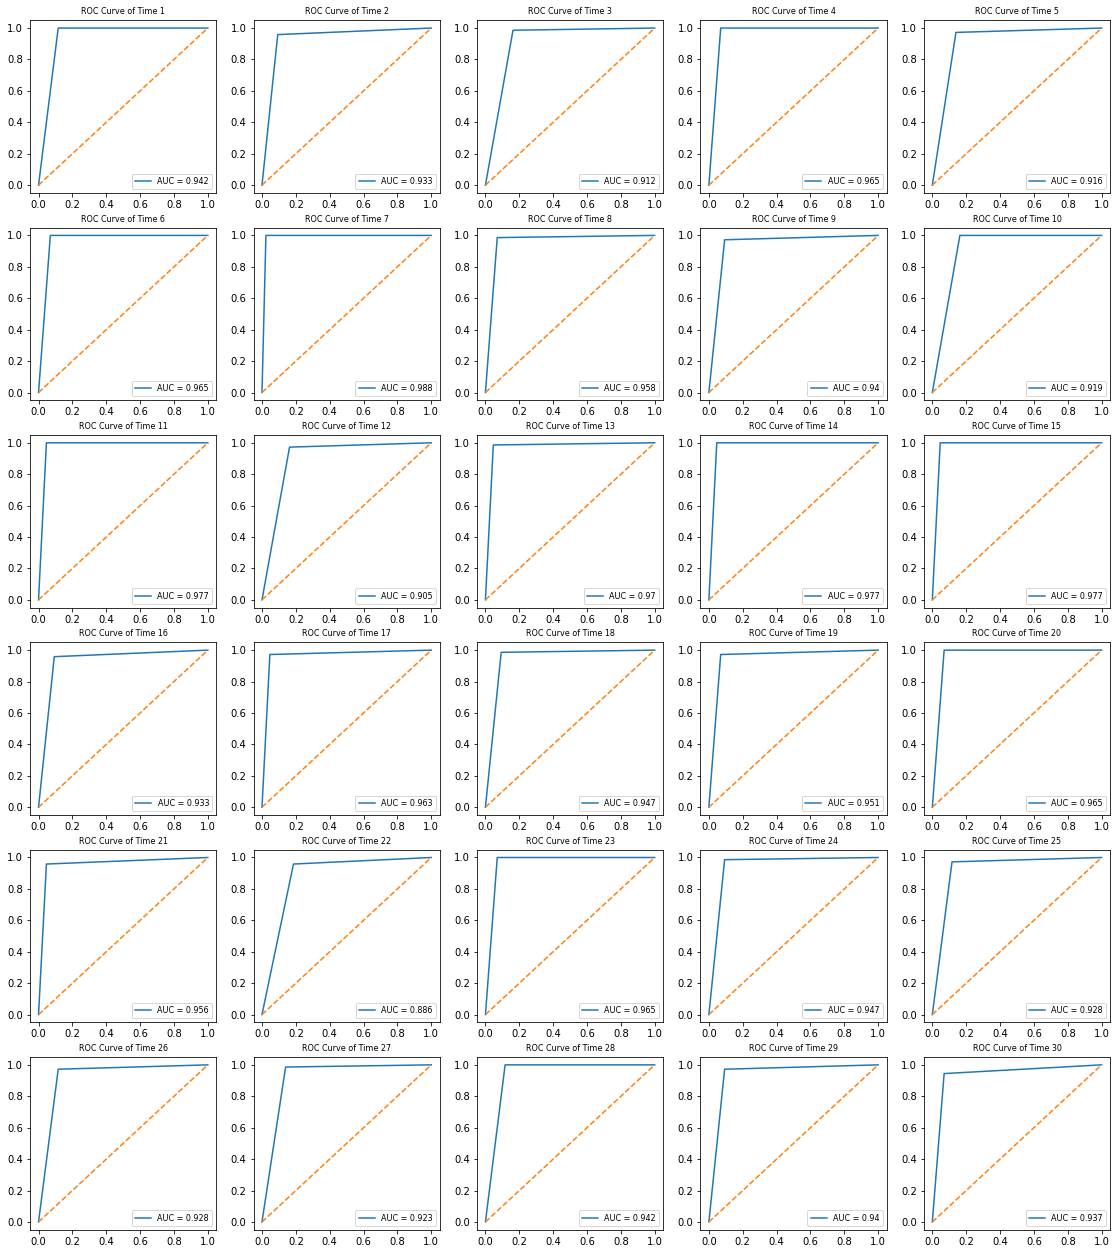

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_test[0][n],roc_test[1][n], label = 'AUC = {}'.format(round(aucs[1][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    38
FN     5
FP     0
TN    72
Name: 0, dtype: int64


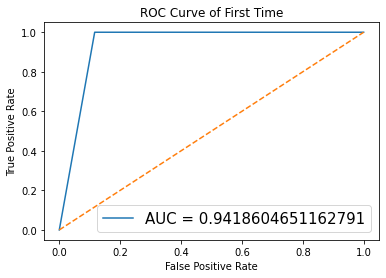

In [ ]:
###   report the first time of ROC, confusion matrix for test data
print('Confusion matrix: ')
print(cm_test.iloc[0,:])
plt.plot(roc_test[0][0],roc_test[1][0], label = 'AUC = {}'.format(aucs[1][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

# iii.

In [ ]:
accuracy_scores, precision_scores, recall_scores, f1_scores, aucs = [[], []], [[], []], [[], []], [[], []], [[], []]
roc_train, roc_test = [[], []], [[], []]
cm_train, cm_test = {'TP': [], 'FN': [], 'FP': [], 'TN': []}, {'TP': [], 'FN': [], 'FP': [], 'TN': []}


for i in range(30):
    X_train, X_test, y_train, y_test = data_split_bi(data_pos, data_neg)
    
    model = KMeans(n_clusters = 2, random_state = i)
    model.fit(X_train)
    
    
    center_points, cluster_label = model.cluster_centers_, model.labels_
    
    distance_train = [[], [], []]
    for i, point in enumerate(X_train):
        distance_train[0].append(np.linalg.norm(point - center_points[cluster_label[i]]))
        distance_train[1].append(np.linalg.norm(point - center_points[0]))
        distance_train[2].append(np.linalg.norm(point - center_points[1]))
    distance_train_prob = softmax(distance_train[1:], axis = 1).astype('float')    

    
    y_train_pre = cluster_label.copy()
    distance_train_ndarray = np.array(distance_train[0])
    for i in range(2):
        cluster_index = list(np.where(cluster_label == i))
        df = pd.DataFrame({'cluster_index': cluster_index[0], 'distance': distance_train_ndarray[[cluster_index]].tolist()[0]})        
        top30 = df.sort_values(by = 'distance', ascending = True)['cluster_index'][:30]
        y_train_pre[cluster_index] = y_train.iloc[top30].value_counts().index[0]
    
    
    distance_test = [[], [], []]
    for i, point in enumerate(X_test):
        distance_test[0].append(np.linalg.norm(point - center_points[cluster_label[i]]))
        distance_test[1].append(np.linalg.norm(point - center_points[0]))
        distance_test[2].append(np.linalg.norm(point - center_points[1]))
    distance_test_prob = softmax(distance_test[1:], axis = 1).astype('float')    
    
    y_test_pre = model.predict(X_test)
    distance_test_ndarray = np.array(distance_test[0])
    for i in range(2):
        cluster_index = list(np.where(y_test_pre == i))
        df = pd.DataFrame({'cluster_index': cluster_index[0], 'distance': distance_test_ndarray[[cluster_index]].tolist()[0]})        
        top30 = df.sort_values(by = 'distance', ascending = True)['cluster_index'][:30]
        y_test_pre[cluster_index] = y_test.iloc[top30].value_counts().index[0]

    
    
    accuracy_scores[0].append(accuracy_score(y_train, y_train_pre))
    accuracy_scores[1].append(accuracy_score(y_test, y_test_pre))
    
    precision_scores[0].append(precision_score(y_train, y_train_pre))
    precision_scores[1].append(precision_score(y_test, y_test_pre))
    
    recall_scores[0].append(recall_score(y_train, y_train_pre))
    recall_scores[1].append(recall_score(y_test, y_test_pre))
    
    
    f1_scores[0].append(f1_score(y_train, y_train_pre))
    f1_scores[1].append(f1_score(y_test, y_test_pre))
    
    a, b, c, d = confusion_matrix(y_train, y_train_pre).ravel()
    cm_train['TP'].append(a)
    cm_train['FN'].append(b)
    cm_train['FP'].append(c)
    cm_train['TN'].append(d)
    
    a, b, c, d = confusion_matrix(y_test, y_test_pre).ravel()
    cm_test['TP'].append(a)
    cm_test['FN'].append(b)
    cm_test['FP'].append(c)
    cm_test['TN'].append(d)
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pre, pos_label = 1)
    aucs[0].append(auc(fpr, tpr))
    roc_train[0].append(fpr)
    roc_train[1].append(tpr)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pre, pos_label = 1)
    aucs[1].append(auc(fpr, tpr))
    roc_test[0].append(fpr)
    roc_test[1].append(tpr)

In [ ]:
score_report = {'Score type': ['average accuracy score', 'average precision score', 'average recall score', 'average F1 score', 'average AUC'],
                  'Training data': [np.mean(accuracy_scores[0]), np.mean(precision_scores[0]), np.mean(recall_scores[0]), np.mean(f1_scores[0]), np.mean(aucs[0])],
                    'Test data': [np.mean(accuracy_scores[1]), np.mean(precision_scores[1]), np.mean(recall_scores[1]), np.mean(f1_scores[1]), np.mean(aucs[1])]}

score_report  = pd.DataFrame(score_report)
score_report

,Score type,Training data,Test data
0,average accuracy score,0.926432,0.765797
1,average precision score,0.915137,0.760366
2,average recall score,0.973099,0.987500
3,average F1 score,0.943194,0.850503
4,average AUC,0.910416,0.691037


In [ ]:
cm_train = pd.DataFrame(cm_train)
print('Confusion matrix on training data of 30 times:')
cm_train

Confusion matrix on training data of 30 times:


,TP,FN,FP,TN
0,143,26,9,276
1,143,26,3,282
2,146,23,11,274
3,145,24,8,277
4,142,27,6,279
5,144,25,7,278
6,143,26,7,278
7,141,28,10,275
8,141,28,8,277
9,142,27,5,280


30


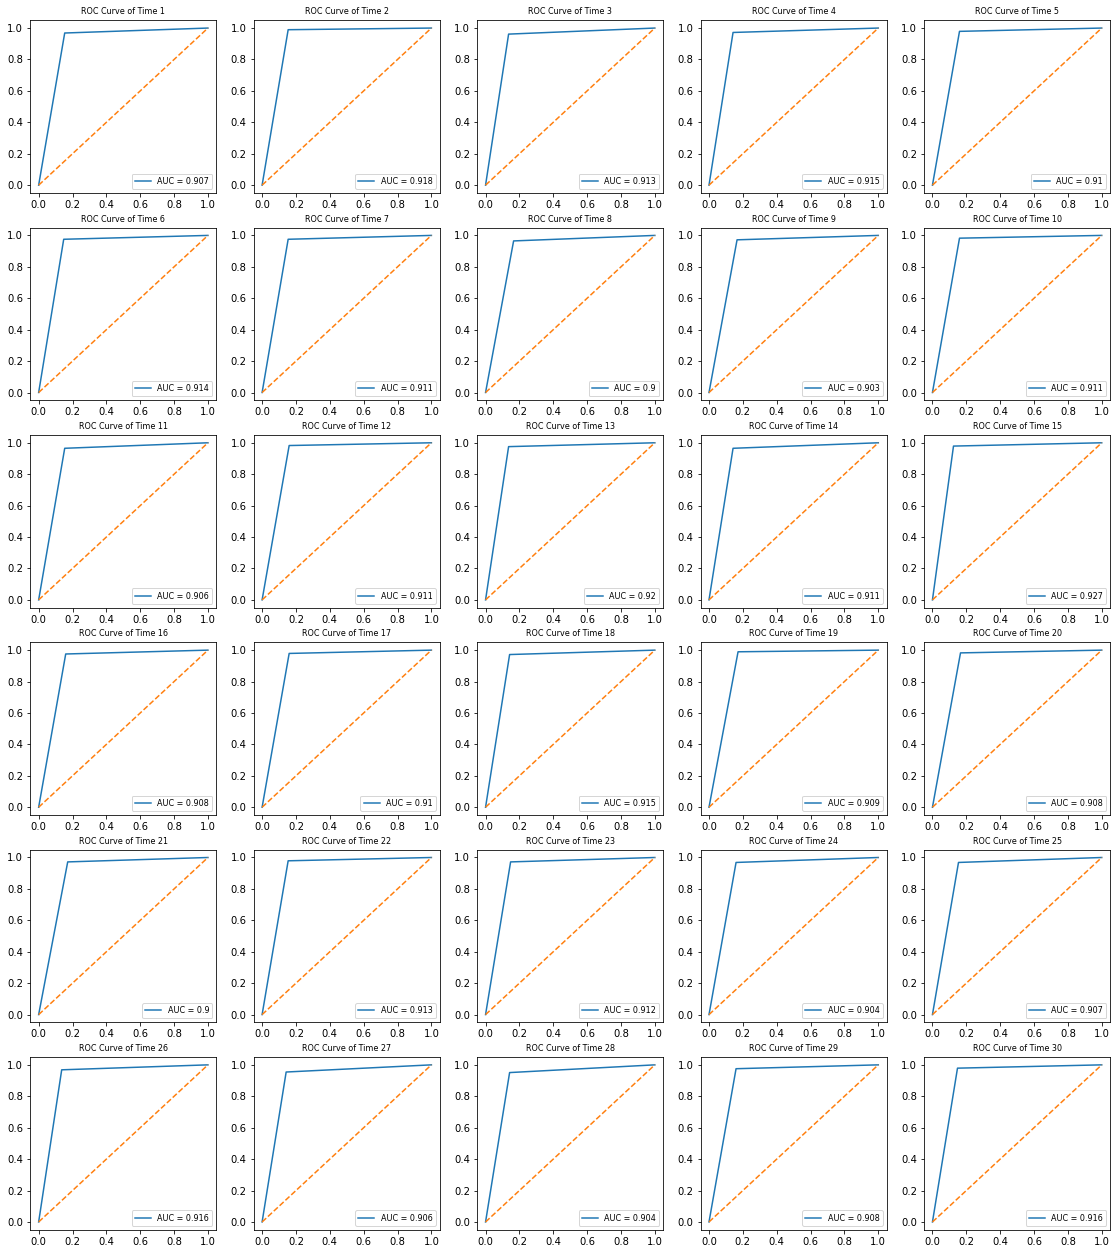

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_train[0][n],roc_train[1][n], label = 'AUC = {}'.format(round(aucs[0][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    143
FN     26
FP      9
TN    276
Name: 0, dtype: int64


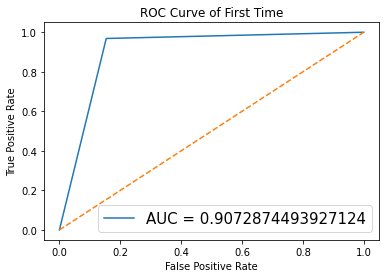

In [ ]:
###   report the first time of ROC, confusion matrix for training data
print('Confusion matrix: ')
print(cm_train.iloc[0,:])
plt.plot(roc_train[0][0],roc_train[1][0], label = 'AUC = {}'.format(aucs[0][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

In [ ]:
cm_test = pd.DataFrame(cm_test)
print('Confusion matrix on test data of 30 times:')
cm_test

Confusion matrix on test data of 30 times:


,TP,FN,FP,TN
0,0,43,0,72
1,0,43,0,72
2,0,43,0,72
3,35,8,1,71
4,0,43,0,72
5,0,43,0,72
6,37,6,2,70
7,39,4,1,71
8,39,4,1,71
9,0,43,0,72


30


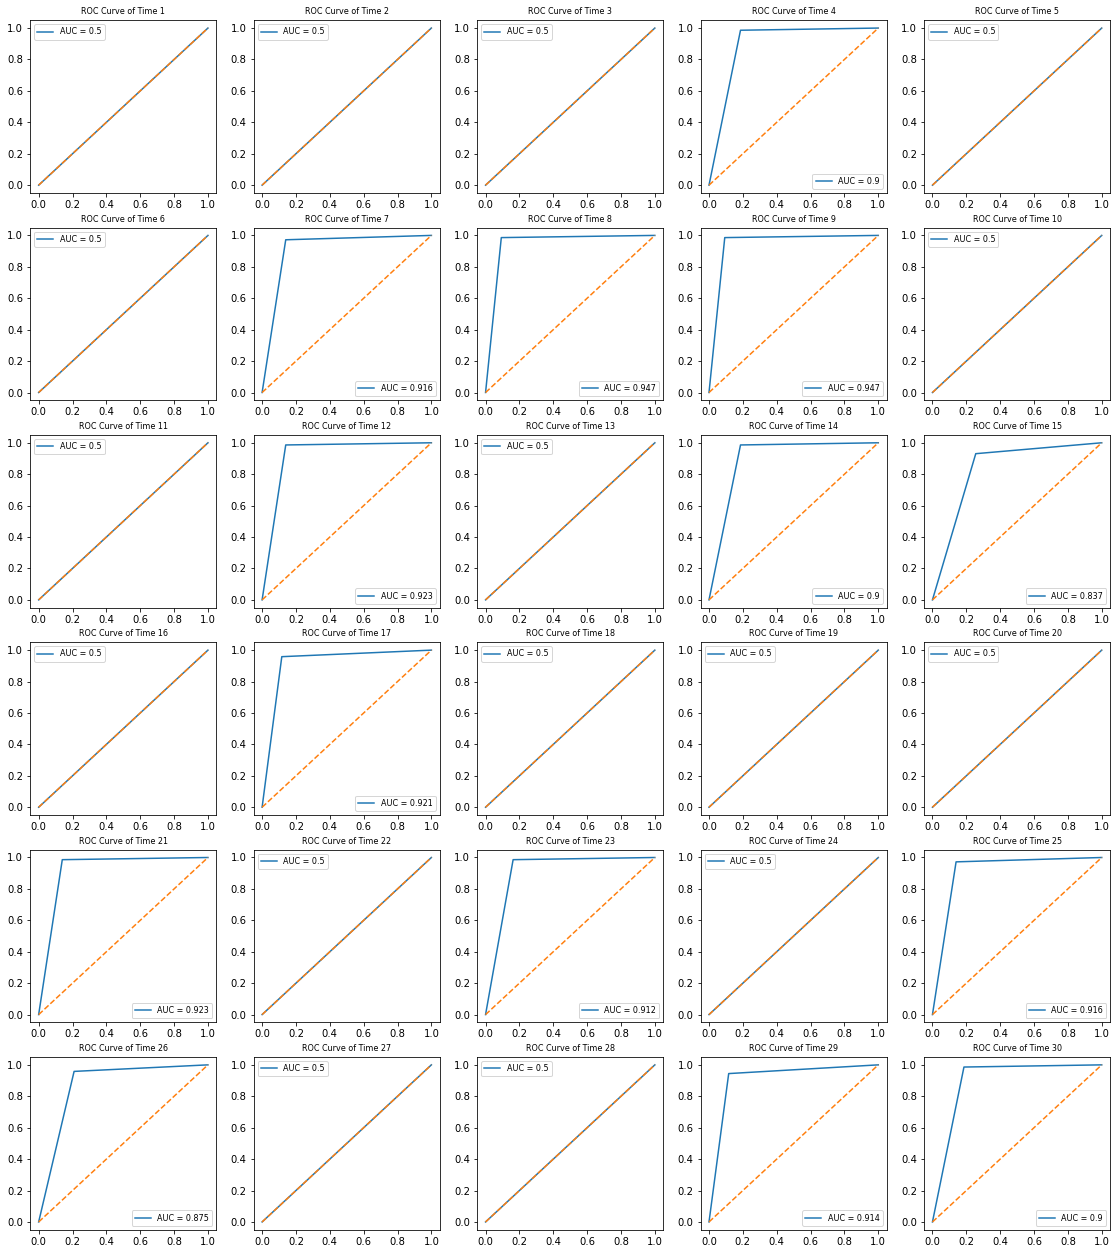

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_test[0][n],roc_test[1][n], label = 'AUC = {}'.format(round(aucs[1][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    35
FN     8
FP     1
TN    71
Name: 3, dtype: int64


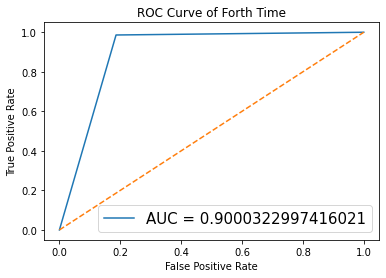

In [ ]:
###   report the forth time of ROC, confusion matrix for test data
print('Confusion matrix: ')
print(cm_test.iloc[3,:])
plt.plot(roc_test[0][3],roc_test[1][3], label = 'AUC = {}'.format(aucs[1][3]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of Forth Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

# iv.

In [ ]:
accuracy_scores, precision_scores, recall_scores, f1_scores, aucs = [[], []], [[], []], [[], []], [[], []], [[], []]
roc_train, roc_test = [[], []], [[], []]
cm_train, cm_test = {'TP': [], 'FN': [], 'FP': [], 'TN': []}, {'TP': [], 'FN': [], 'FP': [], 'TN': []}


for i in range(30):
    X_train, X_test, y_train, y_test = data_split_bi(data_pos, data_neg)
    
    
    model = SpectralClustering(n_clusters = 2, affinity = 'rbf', eigen_tol = 1e-2, assign_labels = 'kmeans',
                                    eigen_solver = 'arpack')
    cluster_label = model.fit_predict(X_train)
    
    center_points = []
    center_points.append(np.mean(X_train[cluster_label == 0], axis = 0).tolist())
    center_points.append(np.mean(X_train[cluster_label == 1], axis = 0).tolist())
    
    
    distance_train = [[], [], []]
    for i, point in enumerate(X_train):
        distance_train[0].append(np.linalg.norm(point - center_points[cluster_label[i]]))
        distance_train[1].append(np.linalg.norm(point - center_points[0]))
        distance_train[2].append(np.linalg.norm(point - center_points[1]))
    distance_train_prob = softmax(distance_train[1:], axis = 1).astype('float')    

    
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, cluster_label)
    
    y_train_pre = knn.predict(X_train)
    distance_train_ndarray = np.array(distance_train[0])
    for i in range(2):
        cluster_index = list(np.where(cluster_label == i))
        df = pd.DataFrame({'cluster_index': cluster_index[0], 'distance': distance_train_ndarray[[cluster_index]].tolist()[0]})        
        top30 = df.sort_values(by = 'distance', ascending = True)['cluster_index'][:30]
        y_train_pre[cluster_index] = y_train.iloc[top30].value_counts().index[0]
    
    
    distance_test = [[], [], []]
    for i, point in enumerate(X_test):
        distance_test[0].append(np.linalg.norm(point - center_points[cluster_label[i]]))
        distance_test[1].append(np.linalg.norm(point - center_points[0]))
        distance_test[2].append(np.linalg.norm(point - center_points[1]))
    distance_test_prob = softmax(distance_test[1:], axis = 1).astype('float')    
    
    y_test_pre = knn.predict(X_test)
    distance_test_ndarray = np.array(distance_test[0])
    for i in range(2):
        cluster_index = list(np.where(y_test_pre == i))
        df = pd.DataFrame({'cluster_index': cluster_index[0], 'distance': distance_test_ndarray[[cluster_index]].tolist()[0]})        
        top30 = df.sort_values(by = 'distance', ascending = True)['cluster_index'][:30]
        y_test_pre[cluster_index] = y_test.iloc[top30].value_counts().index[0]

    
    
    accuracy_scores[0].append(accuracy_score(y_train, y_train_pre))
    accuracy_scores[1].append(accuracy_score(y_test, y_test_pre))
    
    precision_scores[0].append(precision_score(y_train, y_train_pre))
    precision_scores[1].append(precision_score(y_test, y_test_pre))
    
    recall_scores[0].append(recall_score(y_train, y_train_pre))
    recall_scores[1].append(recall_score(y_test, y_test_pre))
    
    
    f1_scores[0].append(f1_score(y_train, y_train_pre))
    f1_scores[1].append(f1_score(y_test, y_test_pre))
    
    a, b, c, d = confusion_matrix(y_train, y_train_pre).ravel()
    cm_train['TP'].append(a)
    cm_train['FN'].append(b)
    cm_train['FP'].append(c)
    cm_train['TN'].append(d)
    
    a, b, c, d = confusion_matrix(y_test, y_test_pre).ravel()
    cm_test['TP'].append(a)
    cm_test['FN'].append(b)
    cm_test['FP'].append(c)
    cm_test['TN'].append(d)
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pre, pos_label = 1)
    aucs[0].append(auc(fpr, tpr))
    roc_train[0].append(fpr)
    roc_train[1].append(tpr)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pre, pos_label = 1)
    aucs[1].append(auc(fpr, tpr))
    roc_test[0].append(fpr)
    roc_test[1].append(tpr)

In [ ]:
score_report = {'Score type': ['average accuracy score', 'average precision score', 'average recall score', 'average F1 score', 'average AUC'],
                  'Training data': [np.mean(accuracy_scores[0]), np.mean(precision_scores[0]), np.mean(recall_scores[0]), np.mean(f1_scores[0]), np.mean(aucs[0])],
                    'Test data': [np.mean(accuracy_scores[1]), np.mean(precision_scores[1]), np.mean(recall_scores[1]), np.mean(f1_scores[1]), np.mean(aucs[1])]}

score_report  = pd.DataFrame(score_report)
score_report

,Score type,Training data,Test data
0,average accuracy score,0.861527,0.725217
1,average precision score,0.823641,0.707221
2,average recall score,0.992749,0.999074
3,average F1 score,0.900169,0.824656
4,average AUC,0.816493,0.632870


In [ ]:
cm_train = pd.DataFrame(cm_train)
print('Confusion matrix on training data of 30 times:')
cm_train

Confusion matrix on training data of 30 times:


,TP,FN,FP,TN
0,108,61,3,282
1,104,65,3,282
2,117,52,3,282
3,102,67,2,283
4,113,56,3,282
5,109,60,3,282
6,107,62,2,283
7,117,52,3,282
8,112,57,1,284
9,107,62,2,283


30


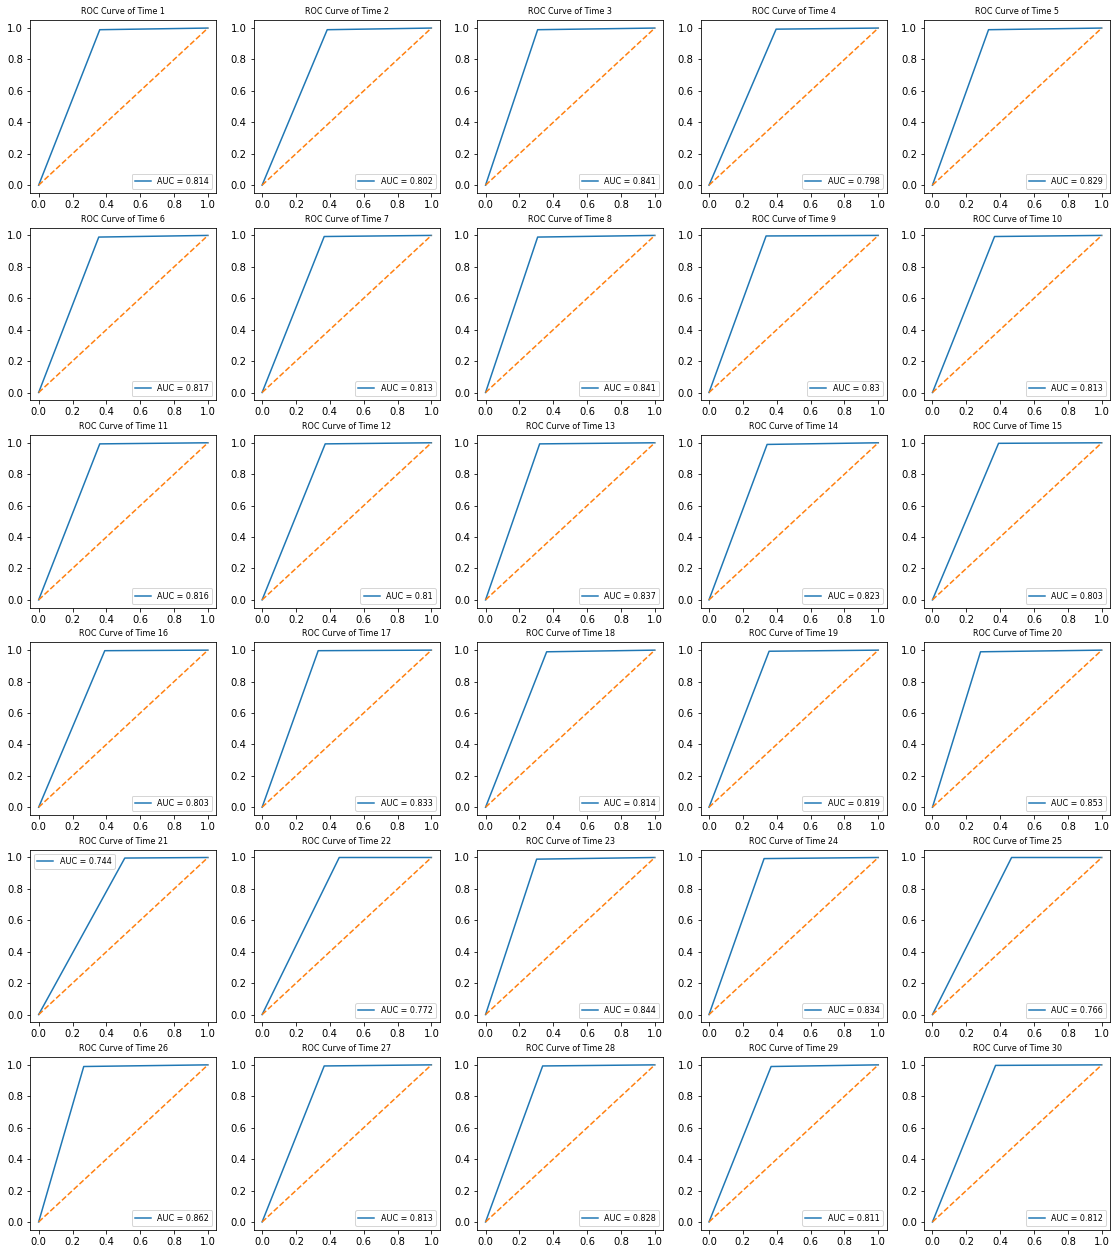

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_train[0][n],roc_train[1][n], label = 'AUC = {}'.format(round(aucs[0][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    108
FN     61
FP      3
TN    282
Name: 0, dtype: int64


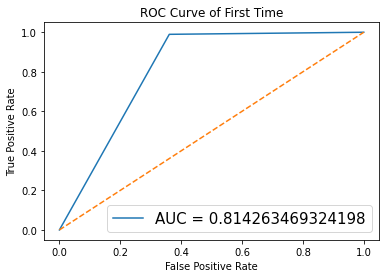

In [ ]:
###   report the first time of ROC, confusion matrix for training data
print('Confusion matrix: ')
print(cm_train.iloc[0,:])
plt.plot(roc_train[0][0],roc_train[1][0], label = 'AUC = {}'.format(aucs[0][0]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of First Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

In [ ]:
cm_test = pd.DataFrame(cm_test)
print('Confusion matrix on test data of 30 times:')
cm_test

Confusion matrix on test data of 30 times:


,TP,FN,FP,TN
0,0,43,0,72
1,26,17,0,72
2,25,18,0,72
3,0,43,0,72
4,25,18,0,72
5,27,16,0,72
6,28,15,1,71
7,0,43,0,72
8,0,43,0,72
9,0,43,0,72


30


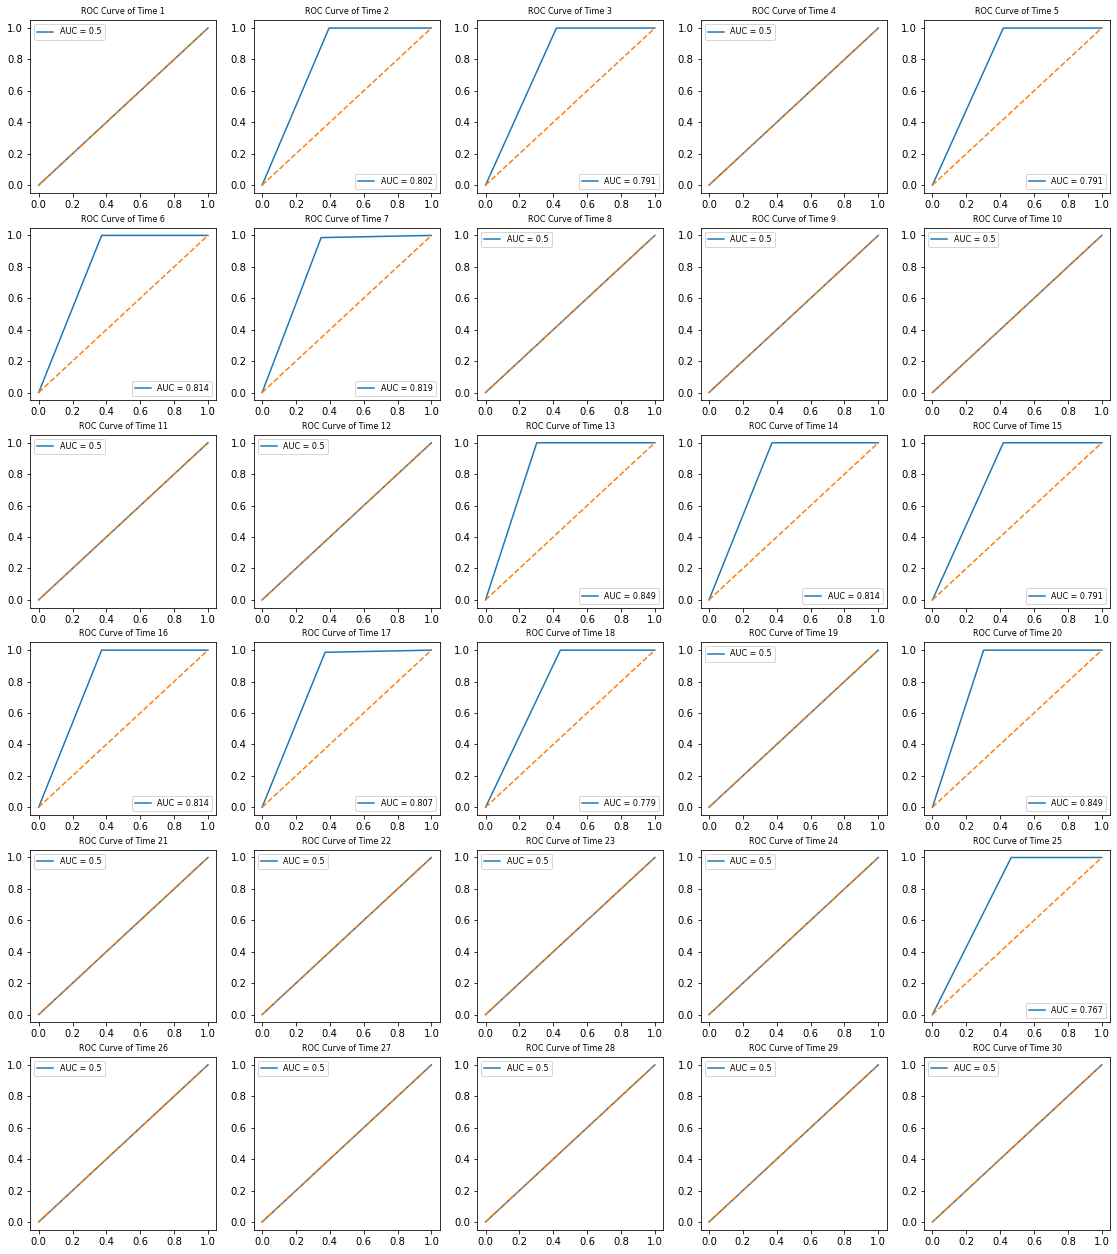

In [ ]:
fig, ax = plt.subplots(figsize = (15, 14), nrows = 6, ncols = 5)
n = 0

for i in range(6):
    for j in range(5):
        ax[i][j].plot(roc_test[0][n],roc_test[1][n], label = 'AUC = {}'.format(round(aucs[1][n], 3)))
        ax[i][j].plot([0, 1], [0, 1], '--')
        ax[i][j].set_title('ROC Curve of Time {}'.format(n + 1), fontsize = 8)
        ax[i][j].legend(prop = {'size': 8})
        n = n + 1
        
        
print(n)
plt.subplots_adjust(left = 1, bottom = 1, right = 2, top = 2.2)
plt.show()

Confusion matrix: 
TP    25
FN    18
FP     0
TN    72
Name: 2, dtype: int64


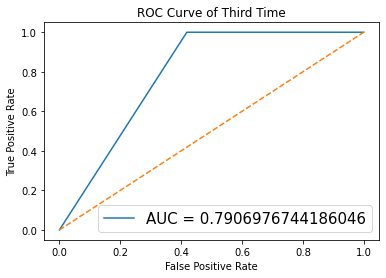

In [ ]:
###   report the third time of ROC, confusion matrix for test data
print('Confusion matrix: ')
print(cm_test.iloc[2,:])
plt.plot(roc_test[0][2],roc_test[1][2], label = 'AUC = {}'.format(aucs[1][2]))
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve of Third Time')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 15})
plt.show()

# v.

#### supervised learning

|          |   Train|      Test|
|--------  |--------|  --------|
|Accuracy  |0.981645|  0.964638|
|precision |0.980673|  0.961879|
|Recall    |0.990292|  0.982870|
|F1        |0.985448|  0.972129|
|AUC       |0.978677|  0.958489|

#### semi-supervised learning

|          |   Train|      Test|
|--------  |--------|  --------|
|Accuracy  |0.991850|  0.954493|
|precision |0.991879|  0.947346|
|Recall    |0.998198|  0.982407|
|F1        |0.995022|  0.964401|
|AUC       |0.981044|  0.945080|

#### unsupervised learning
##### kmeans

|          |   Train|      Test|
|--------  |--------|  --------|
|Accuracy  |0.926432|  0.765797|
|precision |0.915137|  0.760366|
|Recall    |0.973099|  0.987500|
|F1        |0.943194|  0.850503|
|AUC       |0.910416|  0.691037|

##### Spectral Clustering

|          |   Train|      Test|
|--------  |--------|  --------|
|Accuracy  |0.861527|  0.725217|
|precision |0.823641|  0.707221|
|Recall    |0.992749|  0.999074|
|F1        |0.900169|  0.824656|
|AUC       |0.816493|  0.632870|

From the result, supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.

# 2. Active Learning Using Support Vector Machines

# (a)

In [3]:
data = pd.read_csv('data_banknote_authentication.txt', header = None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
def data_split_2(data):
    
    a = [i for i in range(1372)]
    random.shuffle(a)
    
    train , test = data.iloc[a[:900]], data.iloc[a[900:]]
    X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
    
    scaler = MinMaxScaler()
    X_train_scl = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    X_test_scl = pd.DataFrame(scaler.transform(X_test) , columns = X_test.columns)   
    
    return X_train_scl, X_test_scl, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = data_split_2(data)

In [6]:
X_train

,variance,skewness,curtosis,entropy
0,0.344691,0.968797,0.240143,0.011026
1,0.548984,0.514440,0.281224,0.708220
2,0.364465,0.552768,0.215413,0.694815
3,0.680686,0.524196,0.436548,0.901903
4,0.441982,0.440110,0.219288,0.769107
...,...,...,...,...
895,0.792535,0.374216,0.351912,0.764597
896,0.549185,0.859389,0.188541,0.581307
897,0.474193,0.602866,0.099291,0.661616
898,0.434913,0.627566,0.177470,0.605867


In [7]:
X_test

,variance,skewness,curtosis,entropy
0,0.549273,0.893690,0.154841,0.337134
1,0.322934,0.451567,0.292446,0.794415
2,0.803777,0.335502,0.371990,0.714985
3,0.472297,0.629889,0.148642,0.488102
4,0.661186,0.772746,0.247009,0.547358
...,...,...,...,...
467,0.481509,0.623614,0.070649,0.466177
468,0.797842,0.414325,0.335227,0.798173
469,0.680368,0.881997,0.096926,0.489226
470,0.363275,0.496864,0.285140,0.922956


# (b)

# i.

In [8]:
params = {'C': [10 ** i for i in np.arange(-2, 5, dtype = float)]}

In [9]:
learning_pas = []

for i in range(50):
    X_train, X_test, y_train, y_test = data_split_2(data)
    
   
    all_points = [i for i in range(X_train.shape[0])]
    new_points, accuracy_scores = [], []
    
    i = 0
    
    while i <= 89:
        random.shuffle(all_points)
        pool, all_points = all_points[:10], all_points[10:]
        new_points.extend(pool)
        
        model = LinearSVC(penalty = 'l1', dual = False, random_state = i)
        cv_model = StratifiedKFold(5, random_state = i, shuffle = True)
        cv_search = GridSearchCV(estimator = model, param_grid = params, cv = cv_model, n_jobs = -1)
        cv_search.fit(X_train.iloc[new_points], y_train.iloc[new_points])
    
        accuracy_scores.append(accuracy_score(y_test, cv_search.predict(X_test)))
        
        i += 1
    
    learning_pas.append(accuracy_scores)


learning_pas = np.transpose(learning_pas)
learning_pas_mean = []
for i in range(90):
    learning_pas_mean.append(1 - np.mean(learning_pas[i]))

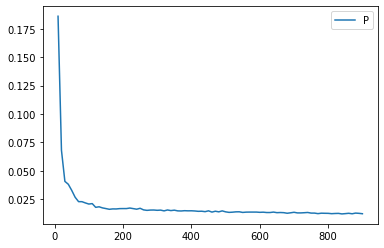

In [10]:
plt.plot([10 * i for i in range(1, 91)], learning_pas_mean)
plt.legend('Passive Learning')
plt.show()

# ii.

In [12]:
learning_act = []

for i in range(50):
    X_train, X_test, y_train, y_test = data_split_2(data)
    
   
    all_points = [i for i in range(X_train.shape[0])]
    new_points, accuracy_scores = [], []
    
    random.shuffle(all_points)
    pool, all_points = all_points[:10], all_points[10:]
    new_points.extend(pool)
    
    i = 0
    
    while i <= 89:
        
        model = LinearSVC(penalty = 'l1', dual = False)
        cv_model = StratifiedKFold(5, random_state = i, shuffle = True)
        cv_search = GridSearchCV(estimator = model, param_grid = params, cv = cv_model, n_jobs = -1)
        cv_search.fit(X_train.iloc[new_points], y_train.iloc[new_points])
    
        accuracy_scores.append(accuracy_score(y_test, cv_search.predict(X_test)))
        
        if len(all_points) == 0:
            break
            
        db = cv_search.decision_function(X_train.iloc[all_points])
        df = pd.DataFrame({'index': all_points, 'distance': db})        
        all_points = df.sort_values(by = 'distance', ascending = True)['index']
        new_points.extend(all_points[:10])
        all_points = all_points[10:]
        
        i += 1
        
    learning_act.append(accuracy_scores)


learning_act = np.transpose(learning_act)
learning_act_mean = []
for i in range(90):
    learning_act_mean.append(1 - np.mean(learning_act[i]))

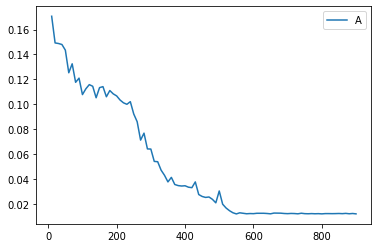

In [13]:
plt.plot([10 * i for i in range(1, 91)], learning_act_mean)
plt.legend('Active Learning')
plt.show()

# (c)

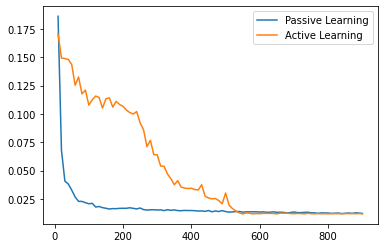

In [14]:
plt.figure()
plt.plot([10 * i for i in range(1, 91)], learning_pas_mean)
plt.plot([10 * i for i in range(1, 91)], learning_act_mean)
plt.legend(['Passive Learning', 'Active Learning'])
plt.show()